# Analysis of COVID-19 progression in Great Britain


> Visualisation of changes in COVID-19 prevalence in Great Britain

- toc: true
- branch: master
- hide: false
- search_exclude: false
- badges: true
- comments: false
- author: Alexandre Payot
- categories: [Visualisation, Data, Covid]

The aim of this blog post is to show the evolution of COVID numbers in a way that captures the global behaviour of the epidemic and lets us answer key questions like:

* Are the current measures working?
* Is the epidemic accelerating or slowing down?

Far from sentionalist headlines or opinions dismissing SARS-CoV-2 as just another flu, we try to extract reliable patterns from the sometimes erratic data which comes of stretched health and testing systems.

This project was started in April 2020, analysing the data for France as part of [data against covid19](https://opencovid19-fr.github.io/) citizen's initiative. I aim to keep updating the data in this article every week along with the commentary of the dynamic of the epidemic.

In [1]:
#hide
%load_ext autoreload
%autoreload 2

In [2]:
#collapse-hide
import pandas as pd
import numpy as np
from uk_covid19 import Cov19API
import datetime
from matplotlib import pyplot as plt
from IPython.display import display, Markdown

You can find and inspect the code used for visualisation at the following address: [payoto/covid19-viz](https://github.com/payoto/covid19-viz).

In [3]:
import viz

In [4]:
# hide
display(Markdown("Article updated on {}".format(datetime.date.today().strftime("%d/%m/%Y"))))

Article updated on 28/01/2021

## Updates

### 06/01/2020

All indicators show the prevalence of each state of the disease is increasing at 5% per day (doubling time of 2 weeks).

## Data access

For this analysis, the [government's API for COVID-19 data](https://coronavirus.data.gov.uk/details/developers-guide#structure-metrics) is used to access data, as installed from [pypi](https://pypi.org/project/uk-covid19/).

In [5]:
all_nations = [
    "areaType=nation"
]
cases_and_deaths = {
    "date": "date",
    "maille_code": "areaName",
    "cas_confirmes": "cumCasesByPublishDate",
    # prefer publish date for deaths as the reporting lag gives a false impression of improvement
    "deces":"cumDeaths28DaysByPublishDate",  
    "reanimation": "covidOccupiedMVBeds",
    "hospitalises": "hospitalCases"
}

api = Cov19API(
    filters=all_nations,
    structure={c : c for c in cases_and_deaths.values()}
)
df = api.get_dataframe()
df = df.rename(
    {v : k for k, v in cases_and_deaths.items()},
    axis="columns"
)
df = df.iloc[::-1]

Our analysis is based on my previous visualisation of French data, in that respect we get it in the same format.

In [6]:
df = viz.enable_time_series_plot(
    df, timein_field="date", timeseries_field_out="t"
)
df["source_nom"] = "PHE"
df["maille_nom"] = df["maille_code"]

## Latest data for England

In this section we look at the processed data for England.
In the first plot on the left the raw data is presented, then the data smoothed over is smoothed using a moving average over 7 days. On the right the number on the vertical axis is the daily change as a proportion of the total.

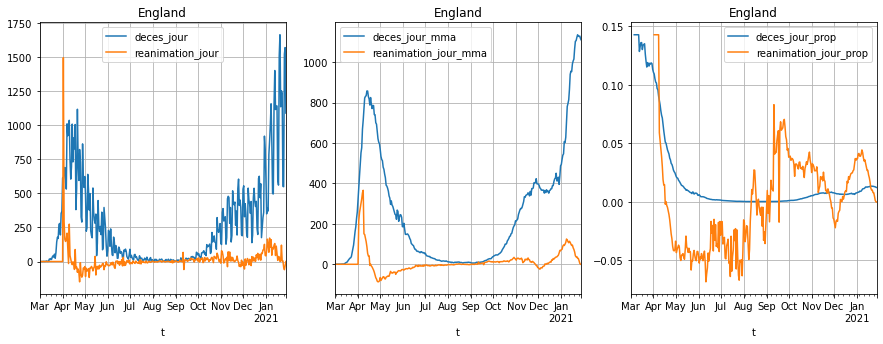

In [7]:
#collapse-hide

maille_active = 'England'
data = viz.oc19_data_preproc(
    df, maille_active,
    rows=["t", "deces", "reanimation", "hospitalises", "cas_confirmes"],
    no_negatives=["deces"],
)

In [8]:
data.tail()

deces  reanimation  hospitalises  cas_confirmes  \
t                                                               
2021-01-24  85974.0       3736.0       32907.0      3187232.0   
2021-01-25  86522.0       3694.0       32938.0      3207381.0   
2021-01-26  88042.0       3634.0       32337.0      3225301.0   
2021-01-27  89610.0       3602.0       30846.0      3248215.0   
2021-01-28  90698.0       3602.0       30846.0      3274397.0   

            reanimation_cumul  hospitalises_cumul  deces_jour  \
t                                                               
2021-01-24           291101.0           2833171.0       551.0   
2021-01-25           294795.0           2866109.0       548.0   
2021-01-26           298429.0           2898446.0      1520.0   
2021-01-27           302031.0           2929292.0      1568.0   
2021-01-28           305633.0           2960138.0      1088.0   

            deces_jour_jour  reanimation_jour  reanimation_jour_jour  ...  \
t                                                                     ...   
2021-01-24           -682.0               5.0                    1.0  ...   
2021-01-25             -3.0             -42.0                  -47.0  ...   
2021-01-26            972.0             -60.0                  -18.0  ...   
2021-01-27             48.0             -32.0                   28.0  ...   
2021-01-28           -480.0               0.0                   32.0  ...   

            reanimation_solde_vivant_jour_jour_mma  deces_jour_mma_jour  \
t                                                                         
2021-01-24                               -7.142857            -6.714286   
2021-01-25                              -13.000000            -1.714286   
2021-01-26                              -11.428571             1.857143   
2021-01-27                              -18.000000           -13.428571   
2021-01-28                               -7.142857            -6.571429   

            deces_jour_prop  reanimation_jour_prop  hospitalises_jour_prop  \
t                                                                            
2021-01-24         0.013124               0.007762               -0.001932   
2021-01-25         0.013021               0.004795               -0.006063   
2021-01-26         0.012817               0.001219               -0.007413   
2021-01-27         0.012443              -0.000040               -0.014079   
2021-01-28         0.012221              -0.000198               -0.011064   

            cas_confirmes_jour_prop  reanimation_cumul_jour_prop  \
t                                                                  
2021-01-24                 0.010270                     0.012552   
2021-01-25                 0.009582                     0.012455   
2021-01-26                 0.008978                     0.012318   
2021-01-27                 0.008380                     0.012170   
2021-01-28                 0.007956                     0.012025   

            hospitalises_cumul_jour_prop  reanimation_solde_vivant_jour_prop  \
t                                                                              
2021-01-24                      0.011819                            0.309766   
2021-01-25                      0.011614                            0.309769   
2021-01-26                      0.011402                            0.311738   
2021-01-27                      0.011133                            0.309511   
2021-01-28                      0.010902                            0.307528   

            deces_jour_mma_jour_prop  
t                                     
2021-01-24                 -0.005951  
2021-01-25                 -0.001522  
2021-01-26                  0.001646  
2021-01-27                 -0.012044  
2021-01-28                 -0.005929  

[5 rows x 43 columns]

In [9]:
#collapse-hide
def plots_maille_code(maille_active='England', **kwargs):
    fra = viz.oc19_data_preproc(
        df, maille_active,
        rows=["t", "deces", "reanimation", "hospitalises", "cas_confirmes"],
        no_negatives=["deces"],
    )
    plt.close()
    # plot_field_loops(fra, "deces_ehpad", center=False, maille_active=maille_active)
    viz.plot_field_loops(fra, "hospitalises_cumul", [7], center=True, maille_active=maille_active, **kwargs)
    viz.plot_field_loops(fra, "reanimation_cumul", [7], center=True, maille_active=maille_active, **kwargs)
    viz.plot_field_loops(fra, "deces", center=True, maille_active=maille_active, **kwargs)
    # if maille_active == "FRA":
    plt.show()
    display(Markdown(
        f"For {maille_active} the number of cases can be analysed. Contrary to to other quantities"
        + " the number of cases is avareged over 14 days with a triangular window."
    ))
    viz.plot_field_loops(
        fra, "cas_confirmes", [14], center=True, maille_active=maille_active,
        win_type='triang',
         **kwargs
    )
    return fra

The next analysis we look at are trend lines which indicate the acceleration of the disease: the daily increase of a disease state (hospitalised, ICU, deceased or number of positive test) is plotted against their total number. Numbers above 0 indicate the SARS-CoV-2 is progressing, while numbers below indicate a reduction.

The raw data is smoothed with a rolling average of 7 days as most indicators have strong weekly periodicity.

These plots evolve by starting from the origin and go towards the top right of the graph. As the disease is brought under controll the lines curve towards the bottom until they cross the x axis and march to the left. Each wave of the disease manifests itself as a loop on the graph. 

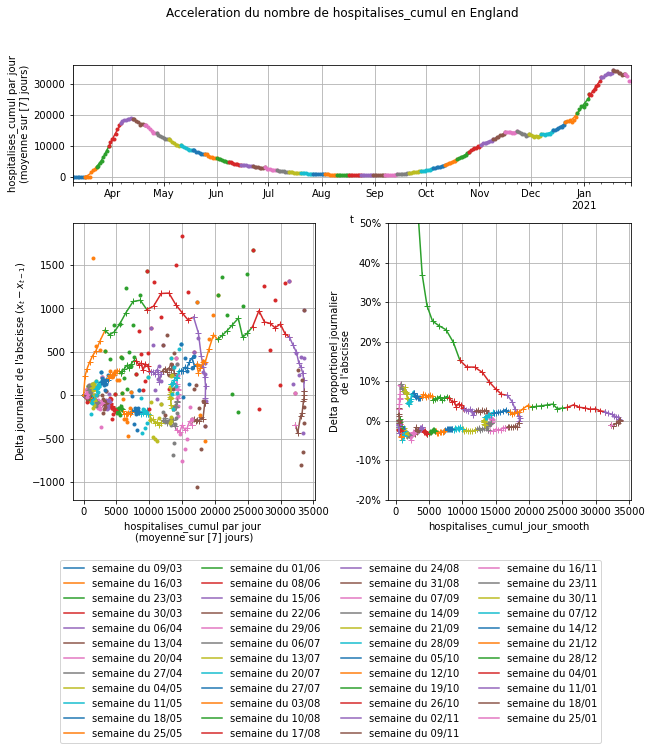

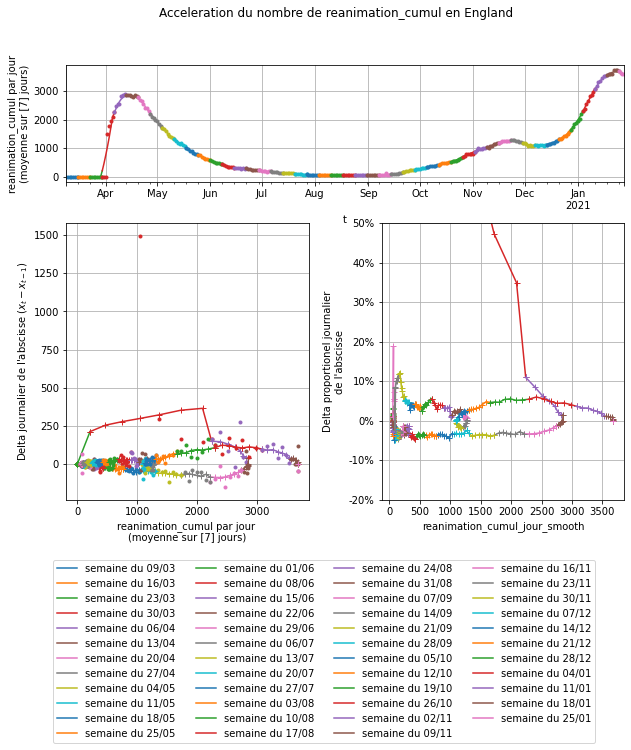

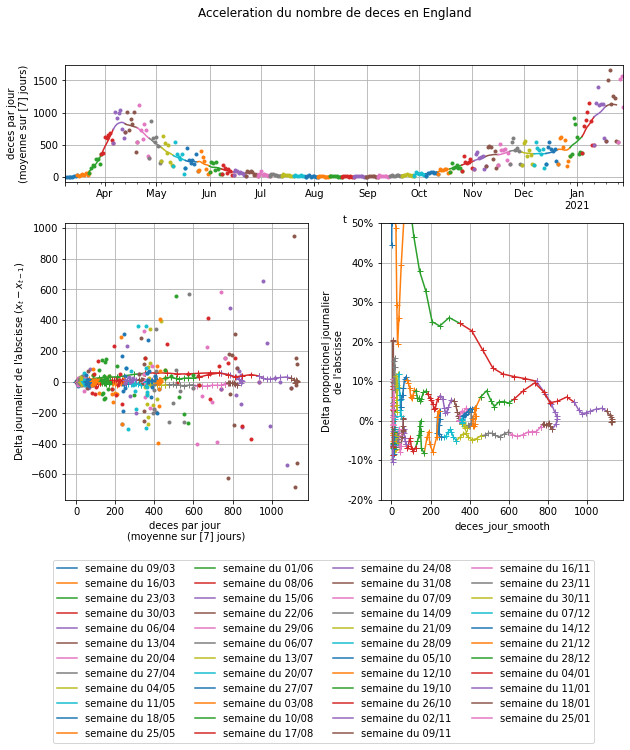

For England the number of cases can be analysed. Contrary to to other quantities the number of cases is avareged over 14 days with a triangular window.

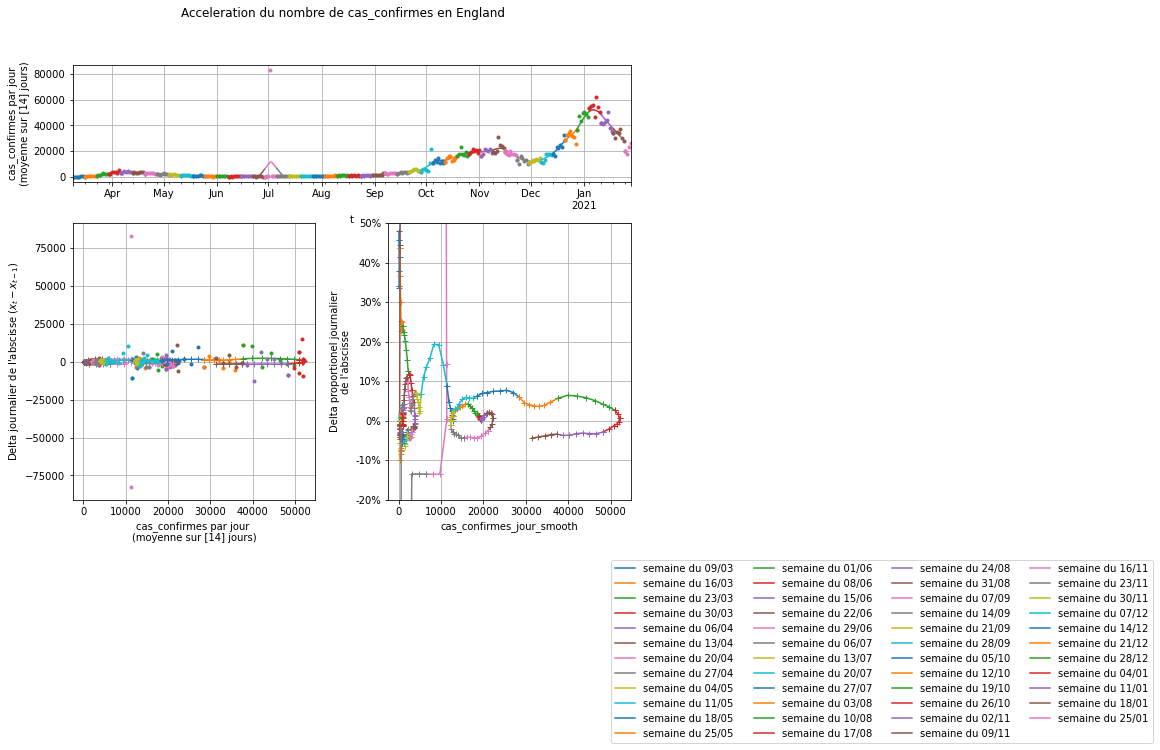

In [10]:
_ = plots_maille_code(maille_active='England')

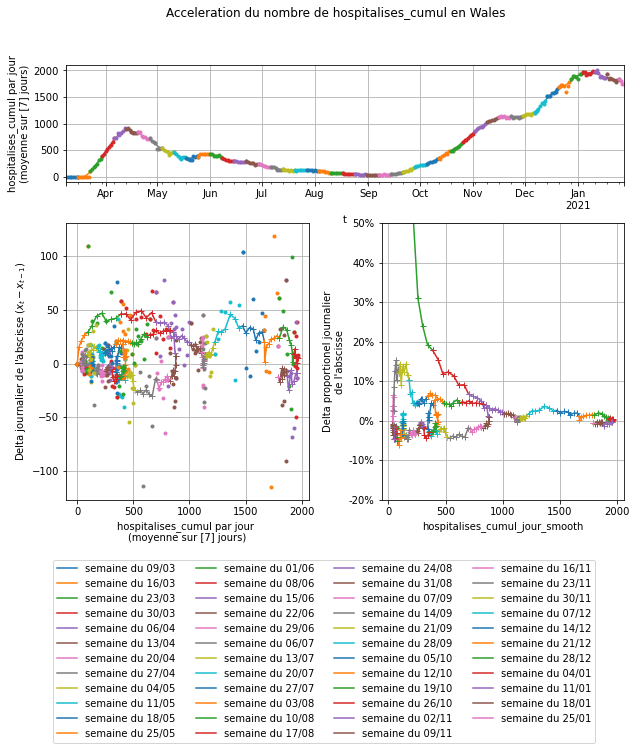

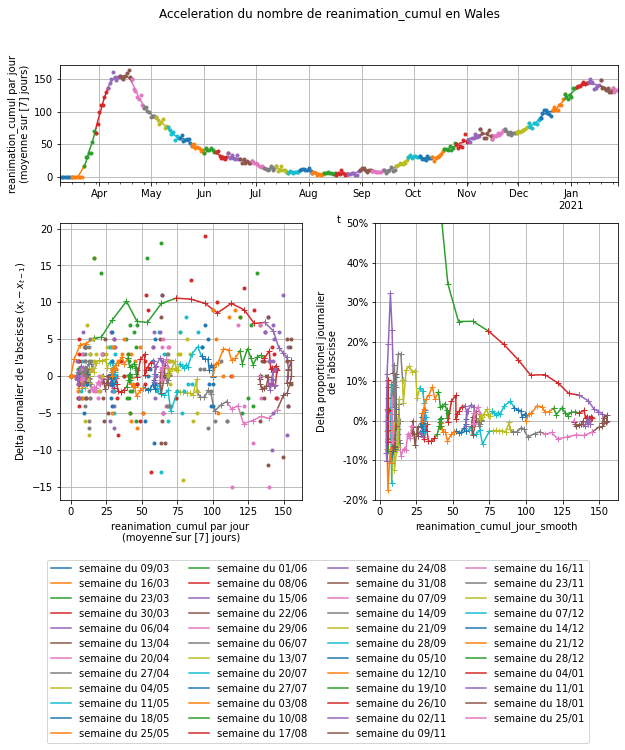

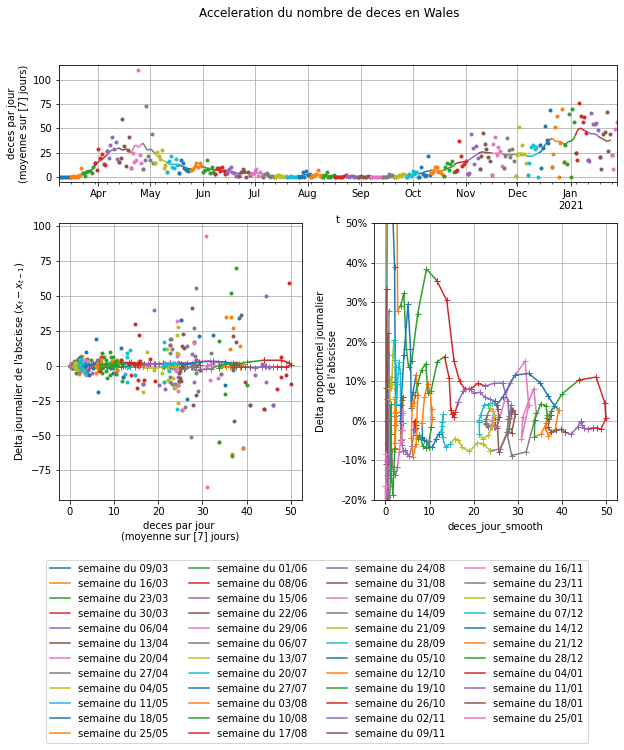

For Wales the number of cases can be analysed. Contrary to to other quantities the number of cases is avareged over 14 days with a triangular window.

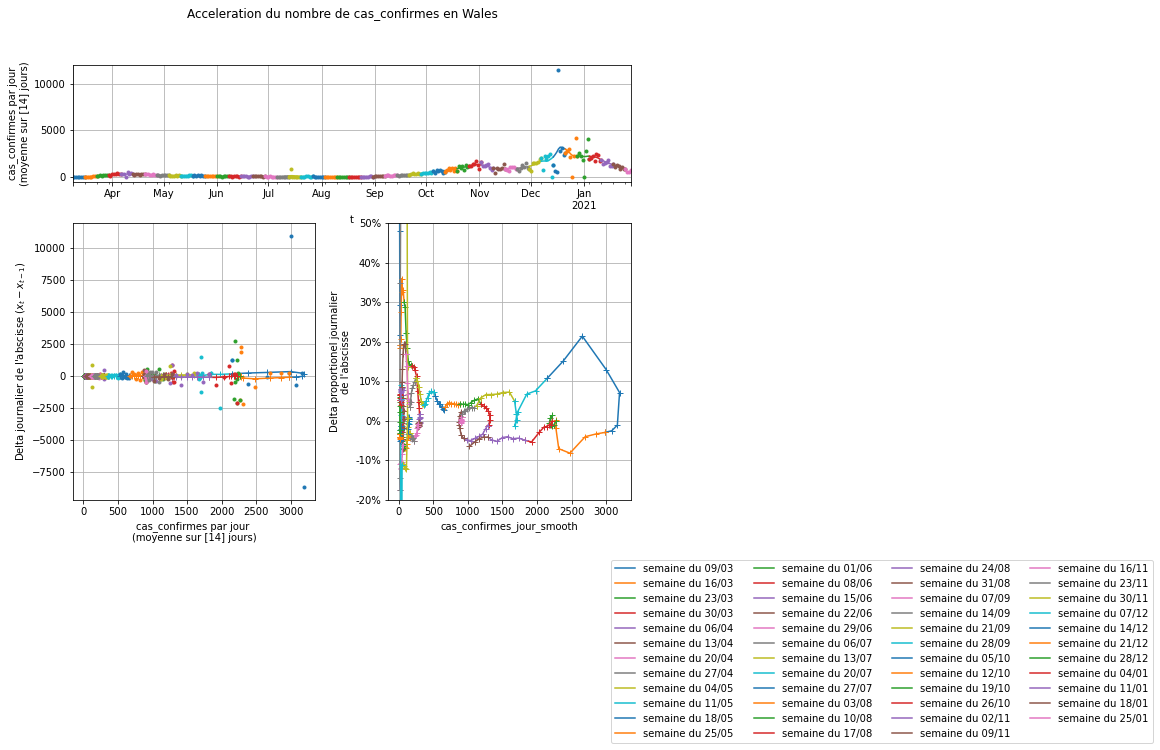

In [11]:
_ = plots_maille_code(maille_active='Wales')

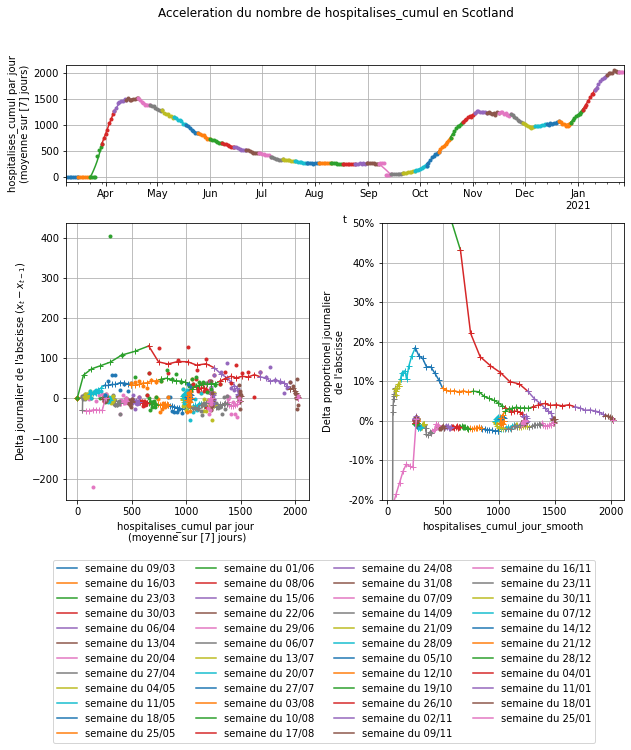

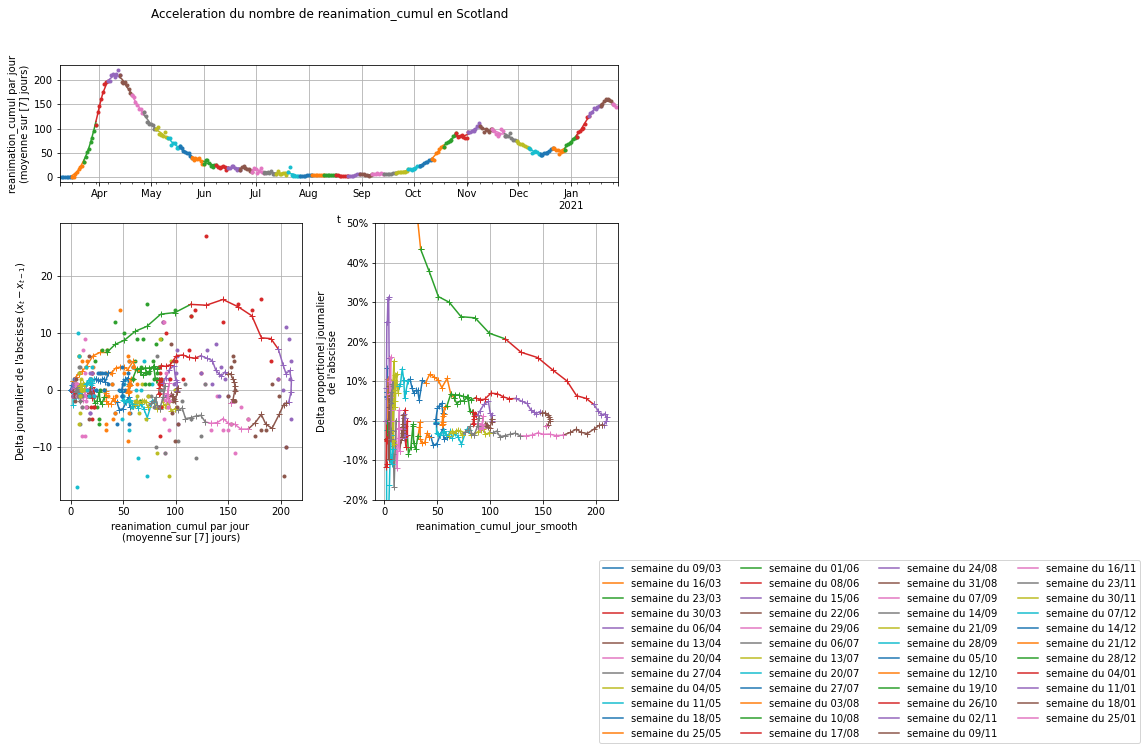

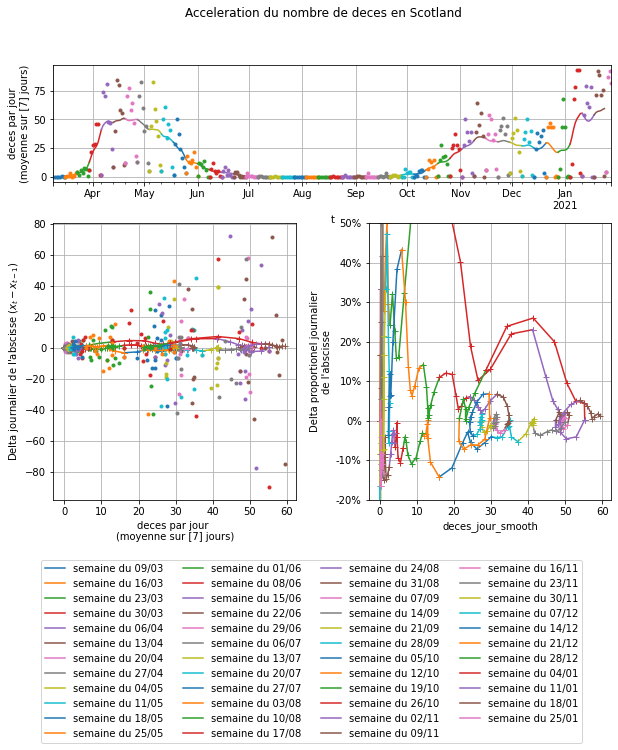

For Scotland the number of cases can be analysed. Contrary to to other quantities the number of cases is avareged over 14 days with a triangular window.

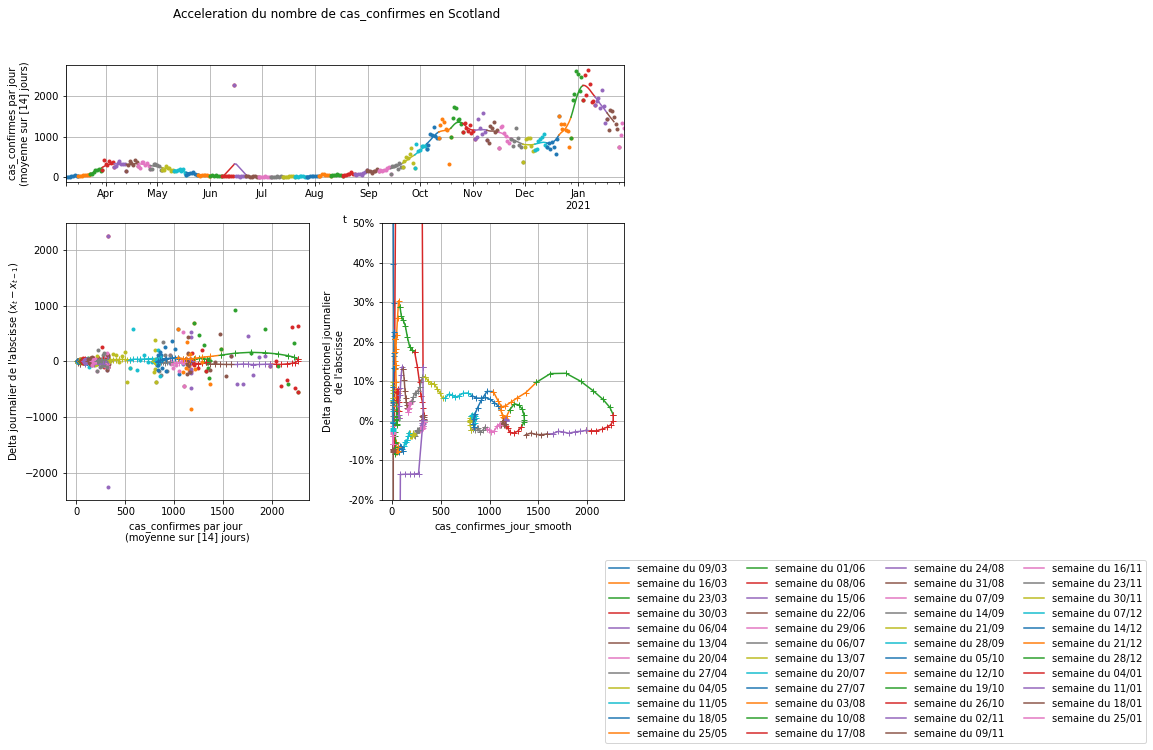

In [12]:
_ = plots_maille_code(maille_active='Scotland')

## Rough estimate of R

Using the number of cases it is possible to arrive at a rough estimate of the reproduction number of the disease the now famous: $R_t$.

The calculation is fairly simple we first calculate the number of infectious people on a given day by saying that people are contagious if they have tested positive in the last 24h or if they will test positive in the next 48h. This number of infectious people is compared to the number of people that will be infected in 5 days.

In [13]:
#collapse-hide
eng, _ = viz.oc19_data_preparation(
    df, "England",
    rows=["t", "deces", "reanimation", "hospitalises", "cas_confirmes"],
    no_negatives=["deces"],
)

# eng = eng.loc["2020-07-15" < eng.index, :]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000232E77F3250>,
      dtype=object)

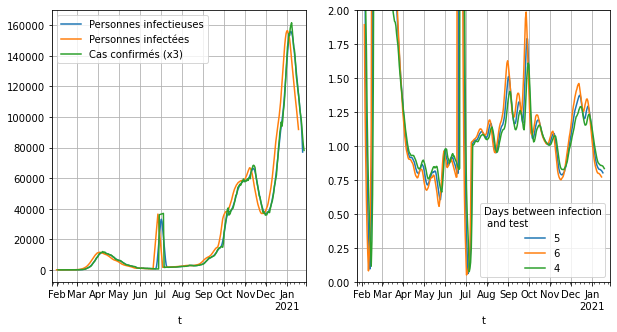

In [14]:
#collapse-hide
viz.plot_R(
    eng,
    infectious_period_around_test = [-1, 2],
    infect_to_test_base = -5,
)

The period up to octover shows a very high reproduction rate, this is certainly due to a ramping up of the test capacity.

Looking in more detail at the period since the start of October we see a brief dip below 1 during the second lockdown.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000232EF991C40>,
      dtype=object)

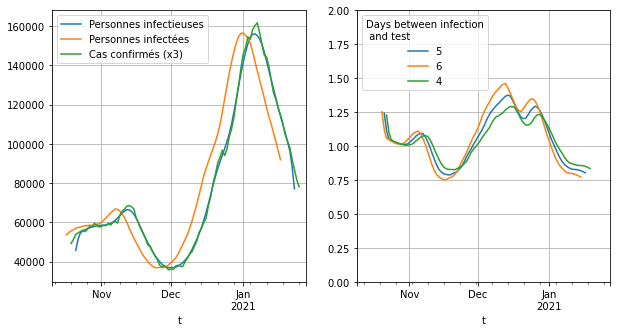

In [15]:
viz.plot_R(
    eng.loc["2020-10-15" < eng.index, :],
    infectious_period_around_test = [-1, 2],
    infect_to_test_base = -5,
)

At the moment these are draft indicators and the exact offset of the dates has not been calculated.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000232EC0085B0>,
      dtype=object)

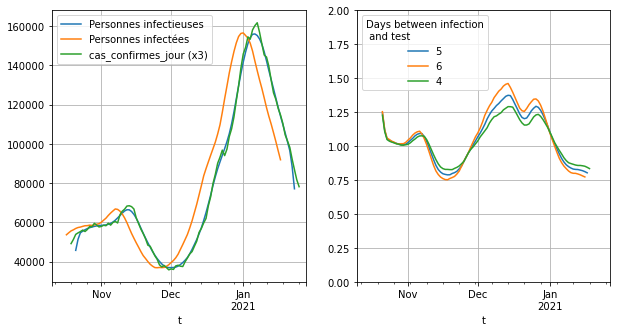

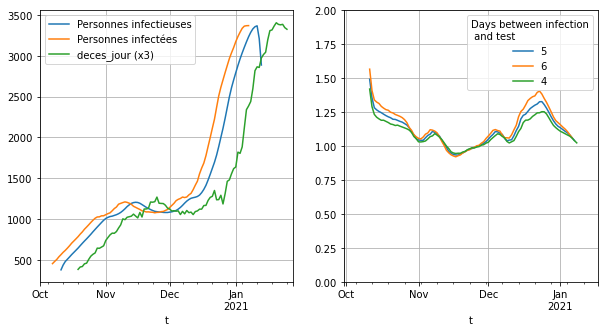

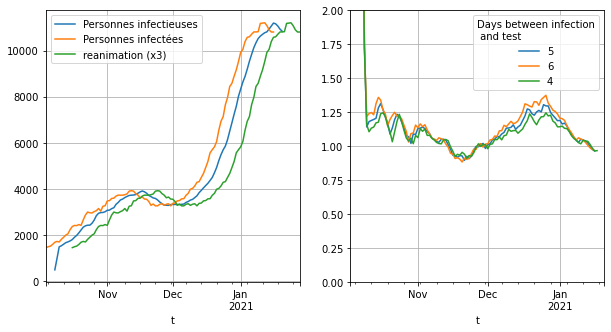

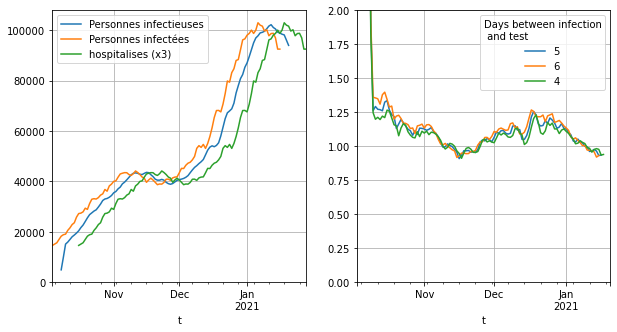

In [47]:
viz.plot_R(
    eng.loc["2020-10-15" < eng.index, :
    ],
)
viz.plot_R_deaths(
    eng.loc["2020-10-15" < eng.index, :
    ],
)
viz.plot_R_reanimation(
    eng.loc["2020-10-15" < eng.index, :
    ],
    windowing={"window":1}
)
viz.plot_R_hospitalised(
    eng.loc["2020-10-15" < eng.index, :
    ],
    windowing={"window":1}
)